# Function defs

Esta tabla contiene la información de las definiciones de funciones.  --> ABEL COMPLETAR <--

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *

full_table = get_data('functiondefs')

# Table name, features and target.
TABLE_NAME = 'functiondefs'
TABLE_FEATURES = ['functiondef__name_convention', 'functiondef__number_of_characters', 'functiondef__is_magic', 'functiondef__is_private', 'functiondef__body_count', 'functiondef__expressions_pct', 'functiondef__is_async', 'functiondef__number_of_decorators', 'functiondef__has_return_type_annotation', 'functiondef__has_doc_string', 'functiondef__height', 'functiondef__type_annotations_pct', 'functiondef__expertise_level']
TABLE_TARGET = 'functiondef__expertise_level'

# Load features and target.
X, y = full_table[TABLE_FEATURES], full_table[[TABLE_TARGET]].iloc[:,0]

# Print information about the loaded table.
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances. For each instance we have {X.shape[1]} attributes.')

2024-05-23 19:18:59.932926 Data cache files found ...
2024-05-23 19:18:59.944449 Data cache files successfully loaded!!
Features shape: (55303, 13)
Target shape: (55303,)
As we can see the downloaded data contains a total of 55303 instances. For each instance we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [2]:
print(X.info())
print('=============')
print(y.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55303 entries, 0 to 55302
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   functiondef__name_convention             55303 non-null  object 
 1   functiondef__number_of_characters        55303 non-null  int64  
 2   functiondef__is_magic                    55303 non-null  bool   
 3   functiondef__is_private                  55303 non-null  bool   
 4   functiondef__body_count                  55303 non-null  int64  
 5   functiondef__expressions_pct             55303 non-null  float64
 6   functiondef__is_async                    55303 non-null  bool   
 7   functiondef__number_of_decorators        55303 non-null  int64  
 8   functiondef__has_return_type_annotation  55303 non-null  bool   
 9   functiondef__has_doc_string              55303 non-null  bool   
 10  functiondef__height                      55303

Cómo podemos ver la tabla está compuesta por 6 variables numéricas, 5 variables boleanas y dos de tipo objeto. 

### 2.1 - Balance de clases

In [3]:
instances_for_class_low = len(full_table[full_table[TABLE_TARGET] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TABLE_TARGET] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low/len(full_table)*100:.4}% instances for BEGINNER class and {instances_for_class_high/len(full_table)*100:.4}% for EXPERT class.")

The dataset contains 43.77% instances for BEGINNER class and 56.23% for EXPERT class.


### 2.2 - Duplicados
Miramos si la tabla tiene entradas duplicadas.

In [4]:
number_of_duplicated_entries = sum(full_table.duplicated(subset=TABLE_FEATURES + [TABLE_TARGET]))
duplicated_entries_pct = number_of_duplicated_entries / len(full_table) * 100
print(f"The dataset contains [{duplicated_entries_pct:.4}%] of duplicated entries.")

The dataset contains [68.69%] of duplicated entries.


### 2.3 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [5]:
X.isnull().sum()

functiondef__name_convention               0
functiondef__number_of_characters          0
functiondef__is_magic                      0
functiondef__is_private                    0
functiondef__body_count                    0
functiondef__expressions_pct               0
functiondef__is_async                      0
functiondef__number_of_decorators          0
functiondef__has_return_type_annotation    0
functiondef__has_doc_string                0
functiondef__height                        0
functiondef__type_annotations_pct          0
functiondef__expertise_level               0
dtype: int64

In [6]:
print_empty_cols(X)

functiondef__name_convention
----------------------------
0 instancias no tienen un valor para la columna functiondef__name_convention


functiondef__number_of_characters
---------------------------------
0 instancias no tienen un valor para la columna functiondef__number_of_characters


functiondef__is_magic
---------------------
0 instancias no tienen un valor para la columna functiondef__is_magic


functiondef__is_private
-----------------------
0 instancias no tienen un valor para la columna functiondef__is_private


functiondef__body_count
-----------------------
0 instancias no tienen un valor para la columna functiondef__body_count


functiondef__expressions_pct
----------------------------
0 instancias no tienen un valor para la columna functiondef__expressions_pct


functiondef__is_async
---------------------
0 instancias no tienen un valor para la columna functiondef__is_async


functiondef__number_of_decorators
---------------------------------
0 instancias no tienen un valo

### 2.4 - Describimos los valores de las variables de la tabla.

In [7]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
functiondef__name_convention,55303,7,SnakeCase,40254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_characters,55303.0,NaN,NaN,NaN,15.812705,9.009721,1.0,10.0,14.0,20.0,87.0
functiondef__is_magic,55303,2,False,55224,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__is_private,55303,2,False,47435,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__body_count,55303.0,NaN,NaN,NaN,4.669168,4.915935,1.0,2.0,3.0,6.0,172.0
functiondef__expressions_pct,55303.0,NaN,NaN,NaN,0.219028,0.259647,0.0,0.0,0.166667,0.333333,1.0
functiondef__is_async,55303,2,False,54355,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__number_of_decorators,55303.0,NaN,NaN,NaN,0.18395,0.583576,0.0,0.0,0.0,0.0,46.0
functiondef__has_return_type_annotation,55303,2,False,42768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
functiondef__has_doc_string,55303,2,False,33883,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesario ver la distribucion de lo valores para hacer los bins (categorias).

In [8]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "functiondef__expressions_pct": [(0.0, 0.0), (0.0, 0.5), (0.5, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_decorators": [(0.0, 0.0), (0.0, inf)], # min: 0 ; max: 46
    "functiondef__type_annotations_pct": [(0.0, 0.0), (0.0, 1.0), (1.0, inf)], # min: 0 ; max: 1
    "functiondef__number_of_characters": [(1.0, 8.0), (8.0, 12), (12, 18), (18, inf)], # min: 1 ; max: 87
    "functiondef__body_count": [(1.0, 1.0), (1.0, 3.0), (3.0, 5.0), (5.0, inf)], # min: 1 ; max: 364
    "functiondef__height": [(1.0, 1.0), (1.0, 1.9), (2.0, 2.0), (2.0, inf)], # min: 1 ; max: 10
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['functiondef__expressions_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_decorators'], 10))
print(get_statistics(X_copy, ['functiondef__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['functiondef__number_of_characters'], 10))
print(get_statistics(X_copy, ['functiondef__body_count'], 10))
print(get_statistics(X_copy, ['functiondef__height'], 10))
print(get_statistics(X_copy, ['functiondef__name_convention'], 10))
print(get_statistics(X_copy, ['functiondef__is_private'], 10))
print(get_statistics(X_copy, ['functiondef__is_magic'], 10))
print(get_statistics(X_copy, ['functiondef__is_async'], 10))
print(get_statistics(X_copy, ['functiondef__has_return_type_annotation'], 10))
print(get_statistics(X_copy, ['functiondef__has_doc_string'], 10))

# 2 FEATURES
print("--- TWO FEATURES ---")
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_SnakeCase'], 10))
#print(get_statistics(X_copy, ['functiondef__number_of_characters', 'functiondef__name_convention_Lower'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
#print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
functiondef__expressions_pct  count  percentage
                   [0.0_0.0]  23586   42.648681
                   [0.0_0.5)  20691   37.413884
                   [0.5_1.0)   8823   15.953927
                   [1.0_inf]   2203    3.983509

functiondef__number_of_decorators  count  percentage
                        [0.0_0.0]  46969   84.930293
                        [0.0_inf]   8334   15.069707

functiondef__type_annotations_pct  count  percentage
                        [0.0_0.0]  40476   73.189520
                        [1.0_inf]  12188   22.038587
                        [0.0_1.0)   2639    4.771893

functiondef__number_of_characters  count  percentage
                         [18_inf]  19504   35.267526
                          [12_18)  16414   29.680126
                         [8.0_12)  10542   19.062257
                        [1.0_8.0)   8843   15.990091

functiondef__body_count  count  percentage
              [5.0_inf]  19258   34.822704
           

### IMPORTANTE
Hay que corregir el doc_string. 

In [9]:
def normalize_datatypes(X:pd.DataFrame, y:pd.Series) -> (pd.DataFrame, pd.Series, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')
    y = y.apply(lambda value: 0 if value == "BEGINNER" else 1) # EXPERT will be 1 and BEGINNER will be 0.
    y = y.astype('float32')
    columns_names = X.columns.tolist()
    return X, y, columns_names

X, y, TABLE_FEATURES = normalize_datatypes(X, y)
# Print information about the loaded table
print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (55303, 20)
Target shape: (55303,)


#### Muestra la matriz de correlación de pearson entre las variables de la tabla.

<Axes: >

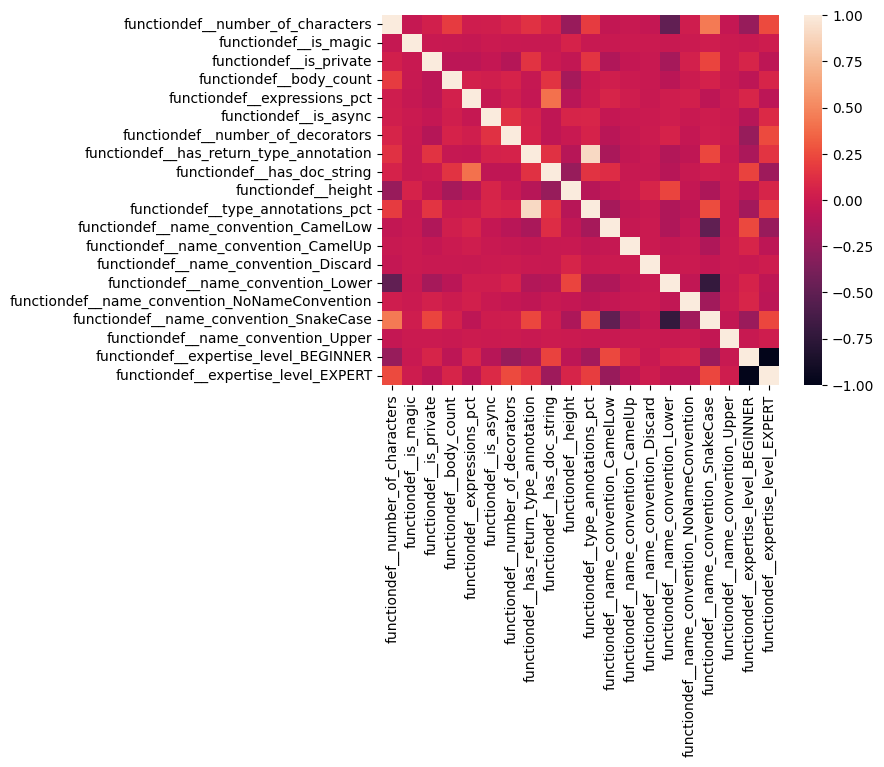

In [10]:
sns.heatmap(X.corr(), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 12 variables (2 porcentuales, 4 numericas, 5 booleanas y 1 categorica)

### Variable is_private (1/12)
Esta variable es de tipo booleano y representa si la función es privada.

<Axes: xlabel='functiondef__is_private', ylabel='Count'>

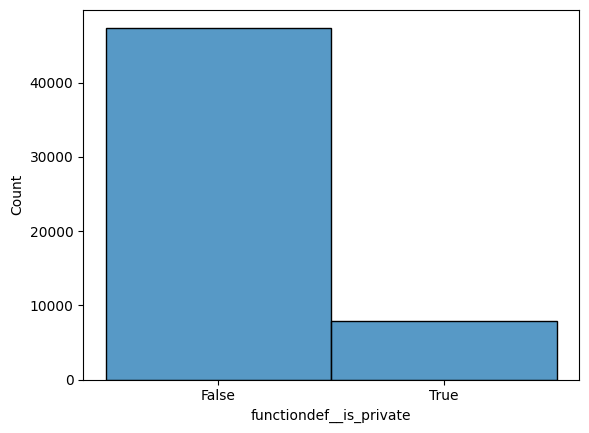

In [11]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_private'], discrete=True)

In [12]:
num_true_values = len(X[X['functiondef__is_private'] == True])
num_false_values = len(X[X['functiondef__is_private'] == False])
std = X['functiondef__is_private'].std()
freq_true = len(X[X['functiondef__is_private'] == True]) / len(X['functiondef__is_private'])
freq_false = len(X[X['functiondef__is_private'] == False]) / len(X['functiondef__is_private'])
print(f'La variable is_private contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_private a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_private a False es {freq_false}.')

La variable is_private contiene 7868 valores verdaderos y 47435 valores falsos. Y, la desviación típica es de 0.3493307828903198
La frecuencia con la que programa puede tener la variable is_private a True es 0.14227076288808926.
La frecuencia con la que programa puede tener la variable is_private a False es 0.8577292371119107.


In [13]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_private', possible_values)

La variable functiondef__is_private contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_private toma el valor de 0.0 en un 85.77% de los items.
La variable functiondef__is_private toma el valor de 1.0 en un 14.23% de los items.


In [14]:
X[X['functiondef__is_private'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,7868.000000,7868.0,7868.0,7868.000000,7868.000000,7868.000000,7868.000000,7868.000000,7868.000000,7868.000000,7868.000000,7868.0,7868.0,7868.0,7868.0,7868.000000,7868.000000,7868.000000,7868.000000,7868.000000
mean,16.541433,0.0,1.0,3.799568,0.169808,0.006990,0.034698,0.374555,0.381291,1.189883,0.398354,0.0,0.0,0.0,0.0,0.027326,0.972039,0.000635,0.517158,0.482842
std,7.365311,0.0,0.0,4.094581,0.231865,0.083321,0.191177,0.484039,0.485735,0.597686,0.481540,0.0,0.0,0.0,0.0,0.163042,0.164873,0.025202,0.499737,0.499737
min,2.000000,0.0,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.0,1.0,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000
50%,15.500000,0.0,1.0,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,0.000000
75%,21.000000,0.0,1.0,5.000000,0.333333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.000000,1.000000,1.000000
max,53.000000,0.0,1.0,172.000000,1.000000,1.000000,3.000000,1.000000,1.000000,7.000000,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable is_magic (2/12)
Esta variable es de tipo booleano y representa si la función es de la forma __\w__.

<Axes: xlabel='functiondef__is_magic', ylabel='Count'>

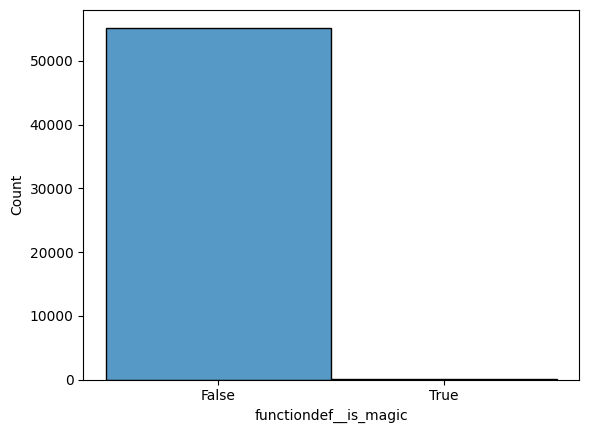

In [15]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_magic'], discrete=True)

In [16]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_magic'] == True])
num_false_values = len(X[X['functiondef__is_magic'] == False])
std = X['functiondef__is_magic'].std()
freq_true = len(X[X['functiondef__is_magic'] == True]) / len(X['functiondef__is_magic'])
freq_false = len(X[X['functiondef__is_magic'] == False]) / len(X['functiondef__is_magic'])
print(f'La variable is_magic contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_magic a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_magic a False es {freq_false}.')

La variable is_magic contiene 79 valores verdaderos y 55224 valores falsos. Y, la desviación típica es de 0.037768758833408356
La frecuencia con la que programa puede tener la variable is_magic a True es 0.0014284939334213334.
La frecuencia con la que programa puede tener la variable is_magic a False es 0.9985715060665786.


In [17]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_magic', possible_values)

La variable functiondef__is_magic contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_magic toma el valor de 0.0 en un 99.86% de los items.
La variable functiondef__is_magic toma el valor de 1.0 en un 0.1428% de los items.


In [18]:
X[X['functiondef__is_magic'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,79.000000,79.0,79.0,79.000000,79.000000,79.0,79.0,79.0,79.000000,79.000000,79.000000,79.0,79.0,79.0,79.0,79.0,79.0,79.0,79.000000,79.000000
mean,9.873418,1.0,0.0,2.582278,0.032188,0.0,0.0,0.0,0.126582,2.253165,0.067511,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.303797,0.696203
std,1.903890,0.0,0.0,1.721713,0.083692,0.0,0.0,0.0,0.334629,0.940108,0.222520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.462835,0.462835
min,7.000000,1.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
25%,8.000000,1.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000
50%,11.000000,1.0,0.0,3.000000,0.000000,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,1.000000
75%,12.000000,1.0,0.0,4.000000,0.000000,0.0,0.0,0.0,0.000000,3.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000
max,12.000000,1.0,0.0,8.000000,0.333333,0.0,0.0,0.0,1.000000,3.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.000000,1.000000



### Variable is_async (3/12)
Esta variable es booleana y representa si la función es asincrona.

<Axes: xlabel='functiondef__is_async', ylabel='Count'>

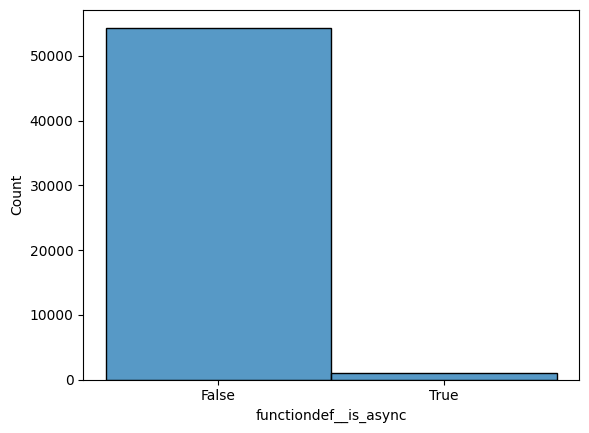

In [19]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__is_async'], discrete=True)

In [20]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__is_async'] == True])
num_false_values = len(X[X['functiondef__is_async'] == False])
std = X['functiondef__is_async'].std()
freq_true = len(X[X['functiondef__is_async'] == True]) / len(X['functiondef__is_async'])
freq_false = len(X[X['functiondef__is_async'] == False]) / len(X['functiondef__is_async'])
print(f'La variable is_async contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable is_async a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable is_async a False es {freq_false}.')

La variable is_async contiene 948 valores verdaderos y 54355 valores falsos. Y, la desviación típica es de 0.12980133295059204
La frecuencia con la que programa puede tener la variable is_async a True es 0.017141927201056.
La frecuencia con la que programa puede tener la variable is_async a False es 0.982858072798944.


In [21]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__is_async', possible_values)

La variable functiondef__is_async contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__is_async toma el valor de 0.0 en un 98.29% de los items.
La variable functiondef__is_async toma el valor de 1.0 en un 1.714% de los items.


In [22]:
X[X['functiondef__is_async'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,948.000000,948.0,948.000000,948.000000,948.000000,948.0,948.000000,948.000000,948.000000,948.000000,948.000000,948.000000,948.0,948.0,948.000000,948.000000,948.000000,948.0,948.000000,948.000000
mean,17.719410,0.0,0.058017,5.662447,0.168197,1.0,0.796413,0.387131,0.184599,1.589662,0.467952,0.009494,0.0,0.0,0.221519,0.001055,0.767932,0.0,0.063291,0.936709
std,11.388751,0.0,0.233899,6.166639,0.240400,0.0,0.920096,0.487351,0.388177,0.888373,0.471414,0.097023,0.0,0.0,0.415488,0.032478,0.422375,0.0,0.243614,0.243614
min,1.000000,0.0,0.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,9.000000,0.0,0.000000,2.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,17.000000,0.0,0.000000,4.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,24.000000,0.0,0.000000,7.000000,0.258647,1.0,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,69.000000,0.0,1.000000,59.000000,1.000000,1.0,5.000000,1.000000,1.000000,6.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable has_return_type_annotation (4/12)
Esta variable es booleana y representa si la function tiene una anotacion del tipo de retorno.

<Axes: xlabel='functiondef__has_return_type_annotation', ylabel='Count'>

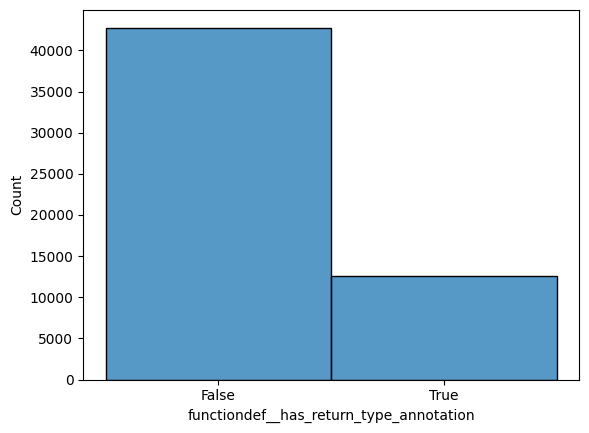

In [23]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_return_type_annotation'], discrete=True)

In [24]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_return_type_annotation'] == True])
num_false_values = len(X[X['functiondef__has_return_type_annotation'] == False])
std = X['functiondef__has_return_type_annotation'].std()
freq_true = len(X[X['functiondef__has_return_type_annotation'] == True]) / len(X['functiondef__has_return_type_annotation'])
freq_false = len(X[X['functiondef__has_return_type_annotation'] == False]) / len(X['functiondef__has_return_type_annotation'])
print(f'La variable has_return_type_annotation contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es {freq_false}.')

La variable has_return_type_annotation contiene 12535 valores verdaderos y 42768 valores falsos. Y, la desviación típica es de 0.41867485642433167
La frecuencia con la que programa puede tener la variable has_return_type_annotation a True es 0.22666039817008118.
La frecuencia con la que programa puede tener la variable has_return_type_annotation a False es 0.7733396018299188.


In [25]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_return_type_annotation', possible_values)

La variable functiondef__has_return_type_annotation contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_return_type_annotation toma el valor de 0.0 en un 77.33% de los items.
La variable functiondef__has_return_type_annotation toma el valor de 1.0 en un 22.67% de los items.


In [26]:
X[X['functiondef__has_return_type_annotation'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,12535.000000,12535.0,12535.000000,12535.000000,12535.000000,12535.000000,12535.000000,12535.0,12535.000000,12535.000000,12535.000000,12535.000000,12535.0,12535.0,12535.000000,12535.000000,12535.000000,12535.0,12535.000000,12535.000000
mean,18.108097,0.0,0.235102,4.389629,0.202822,0.029278,0.247547,1.0,0.510969,1.145114,0.937141,0.002074,0.0,0.0,0.079378,0.000957,0.917591,0.0,0.297886,0.702114
std,8.414640,0.0,0.424079,4.235649,0.228258,0.168591,0.547042,0.0,0.499900,0.495797,0.184563,0.045498,0.0,0.0,0.270338,0.030927,0.274998,0.0,0.457347,0.457347
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,0.142857,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,12.000000,0.0,0.000000,2.000000,0.000000,0.000000,0.000000,1.0,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,0.000000
50%,17.000000,0.0,0.000000,3.000000,0.166667,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,22.000000,0.0,0.000000,5.000000,0.333333,0.000000,0.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,0.0,1.000000,1.000000
max,87.000000,0.0,1.000000,83.000000,1.000000,1.000000,20.000000,1.0,1.000000,6.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable has_doc_string (5/12)
Esta variable es booleana y representa si la function comienza por un String plano a modo de comentario.

<Axes: xlabel='functiondef__has_doc_string', ylabel='Count'>

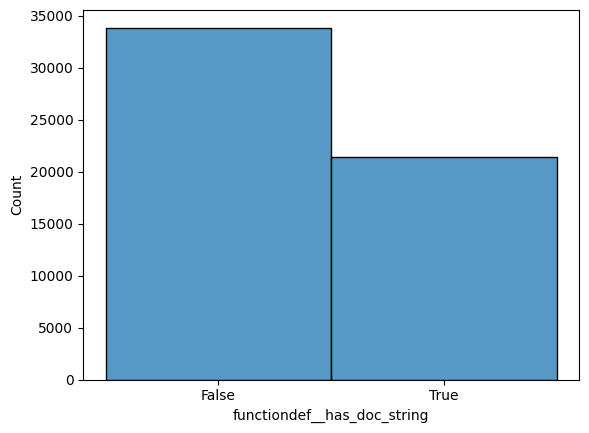

In [27]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['functiondef__has_doc_string'], discrete=True)

In [28]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['functiondef__has_doc_string'] == True])
num_false_values = len(X[X['functiondef__has_doc_string'] == False])
std = X['functiondef__has_doc_string'].std()
freq_true = len(X[X['functiondef__has_doc_string'] == True]) / len(X['functiondef__has_doc_string'])
freq_false = len(X[X['functiondef__has_doc_string'] == False]) / len(X['functiondef__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 21420 valores verdaderos y 33883 valores falsos. Y, la desviación típica es de 0.4871423542499542
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.387320760175759.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.612679239824241.


In [29]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'functiondef__has_doc_string', possible_values)

La variable functiondef__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable functiondef__has_doc_string toma el valor de 0.0 en un 61.27% de los items.
La variable functiondef__has_doc_string toma el valor de 1.0 en un 38.73% de los items.


In [30]:
X[X['functiondef__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.00000,21420.000000,21420.000000,21420.0,21420.000000,21420.000000,21420.000000,21420.000000,21420.0,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000,21420.000000
mean,16.500187,0.000467,0.140056,5.584594,0.350092,0.00817,0.142017,0.299020,1.0,1.053361,0.318358,0.127498,0.005602,0.0,0.117554,0.011018,0.737628,0.000700,0.572409,0.427591
std,8.345885,0.021602,0.347053,4.988234,0.193937,0.09002,0.634607,0.457839,0.0,0.308766,0.453298,0.333537,0.074640,0.0,0.322086,0.104388,0.439934,0.026454,0.494741,0.494741
min,1.000000,0.000000,0.000000,1.000000,0.011628,0.00000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,0.000000,3.000000,0.200000,0.00000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,15.000000,0.000000,0.000000,4.000000,0.333333,0.00000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,21.000000,0.000000,0.000000,7.000000,0.500000,0.00000,0.000000,1.000000,1.0,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,70.000000,1.000000,1.000000,172.000000,1.000000,1.00000,46.000000,1.000000,1.0,5.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_characters (6/12)
Esta variable representa el número de caracteres que tiene el nombre de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 87. Con una media de 15.80.

<Axes: ylabel='functiondef__number_of_characters'>

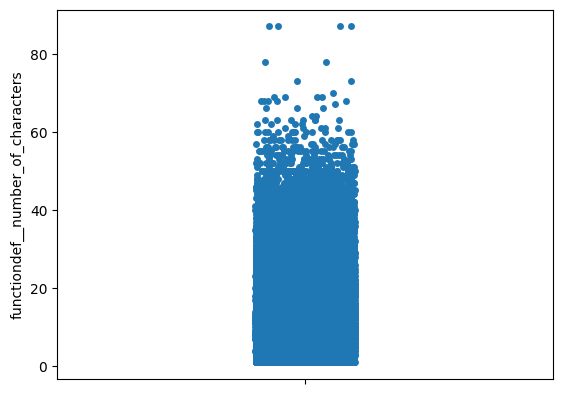

In [31]:
sns.stripplot(X['functiondef__number_of_characters'])

In [32]:
print_outliers_for_df_column(X, 'functiondef__number_of_characters')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.6872395581977312
Rango valores atípicos extremos (Tukey): [-20.0,50.0]
Rango valores atípicos leves (Tukey): [-5.0,35.0]
Rango valores atípicos extremos (Fixed BoxPlot): [8.64647574866585,254.39516582885068]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -20.0 (Q1-3*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_characters inferior a -5.0 (Q1-1.5*IQR) para functiondef__number_of_characters. Representando un 0.0% del total de instancias.
+1.5IQR: 1993 instancias tienen un valor para functiondef__number_of_characters superior a 35.0 (Q3+1.5*IQR) para functiondef__number_of_characters. Representando un 3.604% del total de instancias.
+3.0IQR: 207 instancias tienen un valor para functiondef__number_of_characters superior a 50.0 (Q3-3*IQR) para functiondef__number_of_characters. Rep

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 50.0 (Con un MC de 68 usamos Tuckey Extremo)

In [33]:
X[X['functiondef__number_of_characters'] > 50].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,207.000000,207.0,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.0,207.000000,207.0,207.0,207.0,207.0,207.000000,207.000000,207.0,207.0,207.0
mean,57.120773,0.0,0.009662,8.086957,0.223742,0.048309,0.516908,0.217391,0.236715,1.0,0.294686,0.0,0.0,0.0,0.0,0.004831,0.995169,0.0,0.0,1.0
std,6.796623,0.0,0.098056,6.397222,0.263839,0.214939,0.805596,0.413471,0.426096,0.0,0.450992,0.0,0.0,0.0,0.0,0.069505,0.069505,0.0,0.0,0.0
min,51.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,1.0
25%,52.000000,0.0,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0
50%,55.000000,0.0,0.000000,7.000000,0.166667,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0
75%,60.000000,0.0,0.000000,10.000000,0.333333,0.000000,1.000000,0.000000,0.000000,1.0,1.000000,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0
max,87.000000,0.0,1.000000,41.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.0,1.000000,0.0,0.0,0.0,0.0,1.000000,1.000000,0.0,0.0,1.0


### IMPORTANTE
La mayoria de las funciones con nombres muy largos (>50) son de expertos y en SnakeCase.

### Variable body_count (7/12)
Esta variable representa el número de sentencias en el root de la función. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 172. Con una media de 4.66.

<Axes: ylabel='functiondef__body_count'>

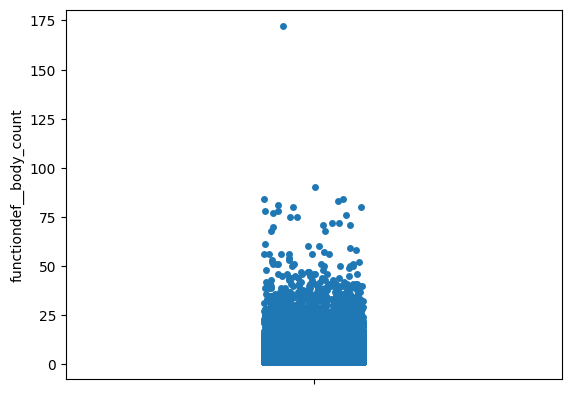

In [34]:
sns.stripplot(X['functiondef__body_count'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [35]:
print_outliers_for_df_column(X, 'functiondef__body_count')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8851099485884626
Rango valores atípicos extremos (Tukey): [-10.0,18.0]
Rango valores atípicos leves (Tukey): [-4.0,12.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.7291324575481892,212.89248528648386]
-3.0IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -10.0 (Q1-3*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__body_count inferior a -4.0 (Q1-1.5*IQR) para functiondef__body_count. Representando un 0.0% del total de instancias.
+1.5IQR: 3007 instancias tienen un valor para functiondef__body_count superior a 12.0 (Q3+1.5*IQR) para functiondef__body_count. Representando un 5.437% del total de instancias.
+3.0IQR: 1159 instancias tienen un valor para functiondef__body_count superior a 18.0 (Q3-3*IQR) para functiondef__body_count. Representando un 2.096% del total de instancias.
L: 10216 instancias tienen un v

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 18.0 (Con un MC de 88 usamos Tuckey Extremo)

In [36]:
X[X['functiondef__body_count'] > 18].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,1159.000000,1159.0,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.000000,1159.0,1159.000000,1159.000000,1159.000000,1159.0,1159.000000,1159.000000
mean,20.367558,0.0,0.044003,27.304573,0.260407,0.037964,0.386540,0.141501,0.437446,1.030198,0.179952,0.080242,0.001726,0.0,0.126833,0.012079,0.779120,0.0,0.221743,0.778257
std,11.312388,0.0,0.205191,11.151705,0.230879,0.191191,0.891734,0.348688,0.496286,0.242225,0.374661,0.271784,0.041523,0.0,0.332930,0.109288,0.415019,0.0,0.415598,0.415598
min,3.000000,0.0,0.000000,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,11.500000,0.0,0.000000,20.000000,0.052632,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
50%,19.000000,0.0,0.000000,24.000000,0.200000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
75%,27.000000,0.0,0.000000,30.000000,0.421053,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.0,0.000000,1.000000
max,66.000000,0.0,1.000000,172.000000,1.000000,1.000000,11.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


### Variable number_of_decorators (8/12)
Esta variable representa el número de decoradores de la funcion. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 46. Con una media de 0.18.

<Axes: ylabel='functiondef__number_of_decorators'>

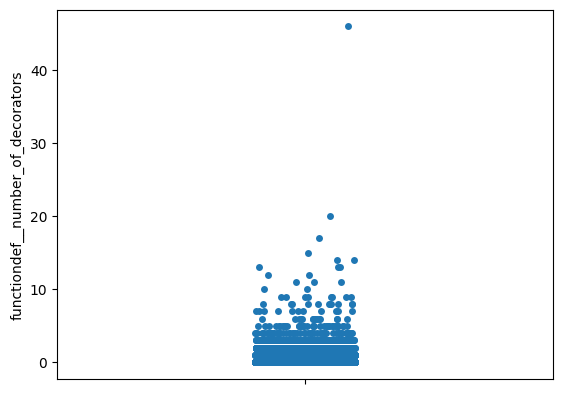

In [37]:
sns.stripplot(X['functiondef__number_of_decorators'])

### IMPORTANTE
El valor máximo está muy alejado del siguiente.

In [38]:
print_outliers_for_df_column(X, 'functiondef__number_of_decorators')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8403943565583993
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-3*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__number_of_decorators inferior a 0.0 (Q1-1.5*IQR) para functiondef__number_of_decorators. Representando un 0.0% del total de instancias.
+1.5IQR: 8334 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3+1.5*IQR) para functiondef__number_of_decorators. Representando un 15.07% del total de instancias.
+3.0IQR: 8334 instancias tienen un valor para functiondef__number_of_decorators superior a 0.0 (Q3-3*IQR) para functiondef__number_of_decorators. Representando un 15.07% del total de ins

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [39]:
X[X['functiondef__number_of_decorators'] > 0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,8334.000000,8334.0,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.00000,8334.00000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000,8334.000000
mean,17.229422,0.0,0.031677,4.877730,0.231957,0.062275,1.220662,0.328414,0.275978,1.298296,0.296661,0.004080,0.00024,0.00096,0.230022,0.001320,0.762539,0.000840,0.060115,0.939885
std,11.390061,0.0,0.175150,5.806248,0.278766,0.241669,0.997248,0.469664,0.447033,0.631053,0.415590,0.063746,0.01549,0.03097,0.420872,0.036309,0.425553,0.028971,0.237714,0.237714
min,1.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
50%,16.000000,0.0,0.000000,3.000000,0.153846,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,24.000000,0.0,0.000000,6.000000,0.373355,0.000000,1.000000,1.000000,1.000000,1.000000,0.666667,0.000000,0.00000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,70.000000,0.0,1.000000,84.000000,1.000000,1.000000,46.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable height (9/12)
Esta variable representa la distancia desde la función hasta el root del módulo (fichero). Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 1 - 10. Con una media de 1.26.

<Axes: ylabel='functiondef__height'>

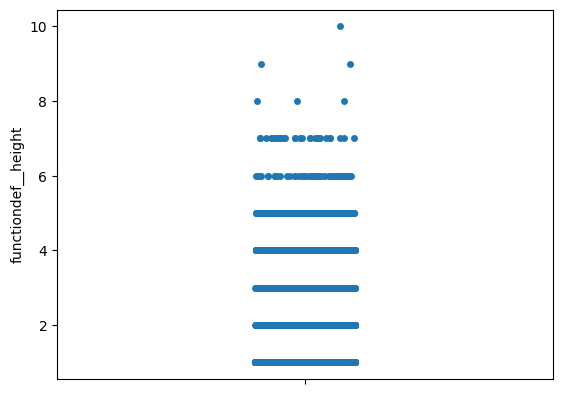

In [40]:
sns.stripplot(X['functiondef__height'])

In [41]:
print_outliers_for_df_column(X, 'functiondef__height')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 1.0
Rango valores atípicos extremos (Tukey): [1.0,1.0]
Rango valores atípicos leves (Tukey): [1.0,1.0]
Rango valores atípicos extremos (Fixed BoxPlot): [1.0,1.0]
-3.0IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-3*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__height inferior a 1.0 (Q1-1.5*IQR) para functiondef__height. Representando un 0.0% del total de instancias.
+1.5IQR: 9318 instancias tienen un valor para functiondef__height superior a 1.0 (Q3+1.5*IQR) para functiondef__height. Representando un 16.85% del total de instancias.
+3.0IQR: 9318 instancias tienen un valor para functiondef__height superior a 1.0 (Q3-3*IQR) para functiondef__height. Representando un 16.85% del total de instancias.
L: 0 instancias tienen un valor para functiondef__height inferior a 1.0 para functiondef__height. Representando un 0.0

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 1.0 (Todos los umbrales son 1)

In [42]:
X[X['functiondef__height'] > 1].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000,9318.000000
mean,10.556558,0.005581,0.099056,2.544752,0.151615,0.036703,0.202404,0.125885,0.077699,2.576841,0.139220,0.049045,0.006117,0.002576,0.373578,0.003649,0.564284,0.000751,0.324855,0.675145
std,6.866970,0.074499,0.298753,2.465624,0.288172,0.188042,0.408174,0.331738,0.267712,0.829871,0.337909,0.215973,0.077977,0.050688,0.483779,0.060299,0.495877,0.027400,0.468346,0.468346
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,15.000000,0.000000,0.000000,3.000000,0.200000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,50.000000,1.000000,1.000000,51.000000,1.000000,1.000000,3.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 83% tienen altura 1, apenas el 7% tienen altura mayor que 2 

### Variable expressions_pct (10/12)
Esta variable representa la proporción de las sentencias en el root de la funcion que son expresiones. Toma los valores de 0.0 - 1.0. La media es 0.21.

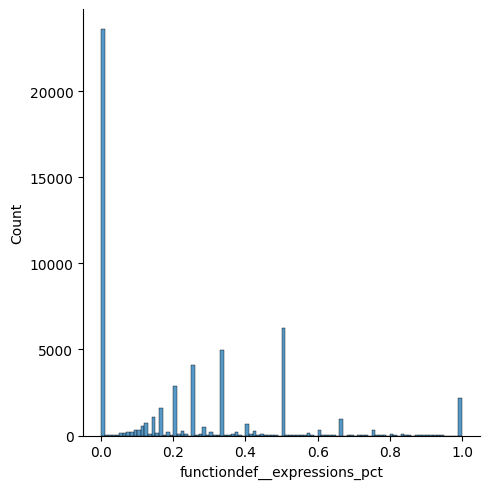

In [43]:
sns.displot(X['functiondef__expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [44]:
print_outliers_for_df_column(X, 'functiondef__expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.521325021982193
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.08063804425887564,4.356836427551342]
-3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -1.0000000298023224 (Q1-3*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__expressions_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para functiondef__expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 2360 instancias tienen un valor para functiondef__expressions_pct superior a 0.833333358168602 (Q3+1.5*IQR) para functiondef__expressions_pct. Representando un 4.267% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para functiondef__expressions_pct superio

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.83 (Con un MC de 0.5 usamos Tuckey)

In [45]:
X[X['functiondef__expressions_pct'] > 0.84].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,2358.000000,2358.0,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000,2358.000000
mean,14.472011,0.0,0.093723,2.818490,0.992737,0.015691,0.249364,0.133164,0.279474,1.477947,0.213308,0.078880,0.018660,0.000424,0.236641,0.034351,0.630619,0.000424,0.382103,0.617896
std,9.971016,0.0,0.291505,3.995453,0.028481,0.124304,0.717493,0.339824,0.448836,0.919859,0.406074,0.269609,0.135349,0.020593,0.425110,0.182168,0.482740,0.020593,0.486005,0.486005
min,1.000000,0.0,0.000000,1.000000,0.842105,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,18.000000,0.0,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,68.000000,0.0,1.000000,77.000000,1.000000,1.000000,12.000000,1.000000,1.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 42% tienen un 0% y casi 4% un 100% de expresiones.

### Variable type_annotations_pct (11/12)
Esta variable representa la proporción de los parámetros que tienen anotación de tipo en la función (incluyendo el return). Este campo toma valores del 0.0 - 1.0. Su media es 0.24.

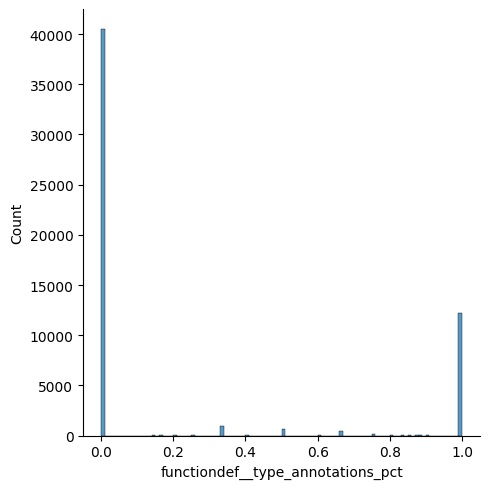

In [46]:
sns.displot(X['functiondef__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [47]:
print_outliers_for_df_column(X, 'functiondef__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.42283378541469574
Rango valores atípicos extremos (Tukey): [-1.0000000298023224,1.3333333730697632]
Rango valores atípicos leves (Tukey): [-0.5000000149011612,0.833333358168602]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.11382815277445806,3.0466940801979017]
-3.0IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -1.0000000298023224 (Q1-3*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para functiondef__type_annotations_pct inferior a -0.5000000149011612 (Q1-1.5*IQR) para functiondef__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 12278 instancias tienen un valor para functiondef__type_annotations_pct superior a 0.833333358168602 (Q3+1.5*IQR) para functiondef__type_annotations_pct. Representando un 22.2% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para fun

In [48]:
X[X['functiondef__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,functiondef__number_of_characters,functiondef__is_magic,functiondef__is_private,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__name_convention_CamelLow,functiondef__name_convention_CamelUp,functiondef__name_convention_Discard,functiondef__name_convention_Lower,functiondef__name_convention_NoNameConvention,functiondef__name_convention_SnakeCase,functiondef__name_convention_Upper,functiondef__expertise_level_BEGINNER,functiondef__expertise_level_EXPERT
count,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.0,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000,14827.000000
mean,18.450665,0.000472,0.219330,4.578742,0.217246,0.033452,0.275443,0.845417,0.498280,1.147771,0.909468,0.002361,0.000067,0.0,0.079652,0.001079,0.916773,0.000067,0.253254,0.746746
std,8.789506,0.021724,0.413806,4.409643,0.245945,0.179821,0.728535,0.361519,0.500014,0.506616,0.208694,0.048530,0.008212,0.0,0.270763,0.032833,0.276234,0.008212,0.434890,0.434890
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.052632,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,17.000000,0.000000,0.000000,3.000000,0.166667,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,23.000000,0.000000,0.000000,6.000000,0.333333,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,87.000000,1.000000,1.000000,83.000000,1.000000,1.000000,20.000000,1.000000,1.000000,10.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### IMPORTANTE
El 73% tienen un 0% y menos del 5% un 100% de anotaciones de tipo.

### Variable name_convention (12/22)
Esta variable es de tipo categórica y representa la name_convention del nombre de la funcion.

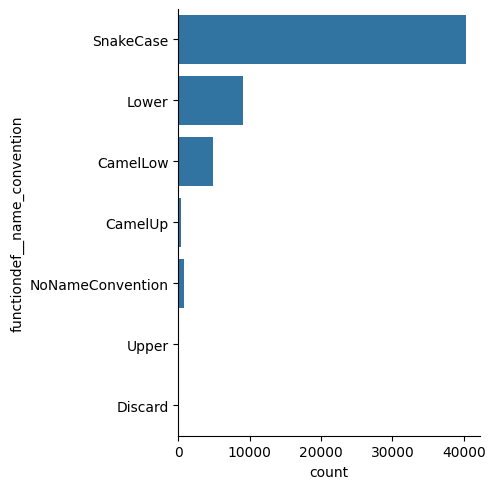

In [49]:
sns.catplot(full_table['functiondef__name_convention'], kind="count")

In [50]:
print_frequency_anal_for_cat_var(full_table, 'functiondef__name_convention')

La variable functiondef__name_convention contiene 7 valores distintos.
El umbral de outlier es de 0.028571428571428574%
La variable functiondef__name_convention toma el valor de SnakeCase en un 72.79% de los items.
La variable functiondef__name_convention toma el valor de Lower en un 16.28% de los items.
La variable functiondef__name_convention toma el valor de CamelLow en un 8.658% de los items.
La variable functiondef__name_convention toma el valor de NoNameConvention en un 1.419% de los items.
La variable functiondef__name_convention toma el valor de CamelUp en un 0.7323% de los items.
La variable functiondef__name_convention toma el valor de Upper en un 0.06871% de los items.
La variable functiondef__name_convention toma el valor de Discard en un 0.05425% de los items.


## Multivariate

TODO: isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,functiondef_id,functiondef__name_convention,functiondef__number_of_characters,functiondef__is_private,functiondef__is_magic,functiondef__body_count,functiondef__expressions_pct,functiondef__is_async,functiondef__number_of_decorators,functiondef__has_return_type_annotation,functiondef__has_doc_string,functiondef__height,functiondef__type_annotations_pct,functiondef__expertise_level
33057,6936743,SnakeCase,46,False,False,11,0.363636,True,4,False,False,1,1.000000,EXPERT
33062,6936426,SnakeCase,50,False,False,10,0.300000,True,5,False,False,1,1.000000,EXPERT
33063,6936334,SnakeCase,36,False,False,10,0.300000,True,5,False,False,1,1.000000,EXPERT
33994,6774356,Lower,3,False,False,4,0.000000,True,0,True,False,3,1.000000,EXPERT
34165,6749805,Lower,3,False,False,3,0.000000,True,0,True,False,3,1.000000,EXPERT
34233,6745848,Lower,3,False,False,5,0.000000,True,0,True,False,3,1.000000,EXPERT
34305,6736949,Lower,3,False,False,3,0.000000,True,0,True,False,3,1.000000,EXPERT
34317,6735139,Lower,3,False,False,3,0.000000,True,0,True,False,3,1.000000,EXPERT
34341,6732358,Lower,3,False,False,3,0.000000,True,0,True,False,3,1.000000,EXPERT
34386,6725100,Lower,3,False,False,3,0.000000,True,0,True,False,3,1.000000,EXPERT


### IMPORTANTE
Hay que analizar los 55 los outliers de la tabla.